
# 1.-Datos Covid con cluster

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:

import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle


In [3]:
Categories=['Otras causas','COVID-19']
print("Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball");


Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball


Cargamos los datos

In [4]:
import random

# Establecer la semilla
random.seed(42)

In [5]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

flat_data_arr = []
target_arr = []
image_names_arr = []  
# Por favor, utiliza datadir='/content' si los archivos se cargan en Google Colab
# De lo contrario, monta la unidad y proporciona la ruta del directorio principal que contiene todas las carpetas de imágenes de categoría.
datadir = r'C:\Users\andre\Desktop\images\carpeta_otras'

# Iterar sobre las categorías
for i in Categories:
    print(f'Cargando... categoría: {i}')
    path = os.path.join(datadir, i)
    images_in_category = os.listdir(path)
    # Seleccionar solo el 10% de las imágenes en la categoría actual
    num_images_to_select = int(1 * len(images_in_category))
    selected_images = np.random.choice(images_in_category, num_images_to_select, replace=False)

    for img in selected_images:
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (60, 60, 3))
        flat_data_arr.append(img_resized)
        target_arr.append(Categories.index(i))
        image_names_arr.append(img)  # Guardar el nombre de la imagen
    print(f'Categoría cargada correctamente: {i}')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)



Cargando... categoría: Otras causas
Categoría cargada correctamente: Otras causas
Cargando... categoría: COVID-19
Categoría cargada correctamente: COVID-19


In [6]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [7]:
import numpy as np

# Calcula la media y la desviación estándar de flat_data
mean_value = np.mean(flat_data)
std_value = np.std(flat_data)

print("Media de los datos:", mean_value)
print("Desviación estándar de los datos:", std_value)


Media de los datos: 0.5506352710065
Desviación estándar de los datos: 0.24699215374068795


In [8]:
max_value = np.max(flat_data)
min_value = np.min(flat_data)

In [9]:
print(max_value )
print(min_value )

1.0
0.0


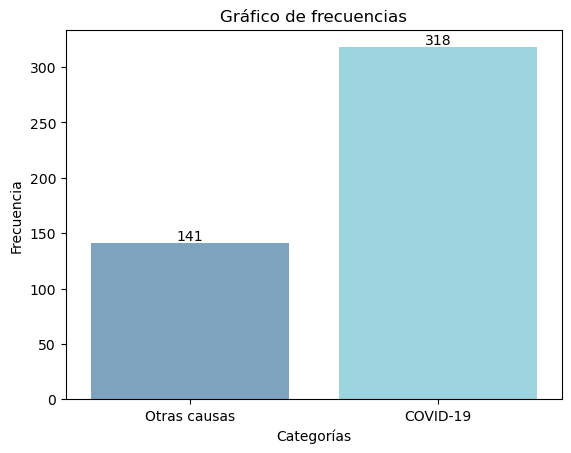

In [10]:
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# Supongamos que 'target' es tu variable de destino
colores = ['#73A4CA', '#91DCEA', '#64CDCC', '#5FBB68', '#F9D23C', '#F9A729', '#FD6F30']

# Convert hexadecimal colors to RGBA
colores_rgba = [mcolors.to_rgba(color) if len(color) == 7 else mcolors.to_rgba(color + 'FF') for color in colores]

# Crear un DataFrame con los datos
df = pd.DataFrame(target, columns=['Labels'])

# Convertir 0 y 1 de 'target' a 'Parasitized' y 'Uninfected'
df['Labels'] = df['Labels'].replace({0: 'Otras causas', 1: 'COVID-19'})

# Gráfico de conteo con las categorías 'Parasitized' y 'Uninfected'
sx = sns.countplot(x='Labels', data=df, palette=colores_rgba)

# Añadir etiquetas a los ejes x e y
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

# Añadir título al gráfico
plt.title('Gráfico de frecuencias')

# Añadir el número de conteo encima de cada barra
for p in sx.patches:
    sx.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Guardar el gráfico como imagen
plt.savefig('frecuencias.png')

# Mostrar el gráfico
plt.show()


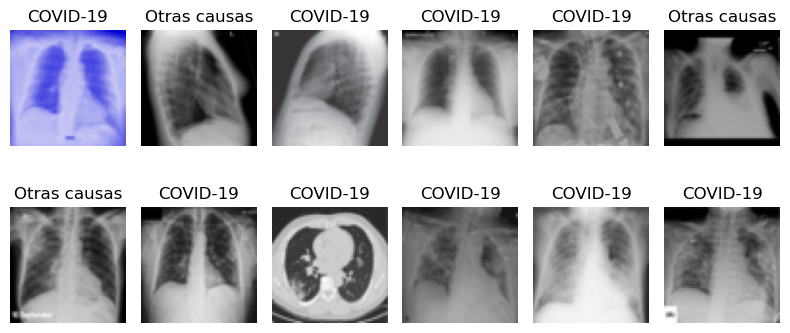

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

rows = 2
cols = 6

for n, i in enumerate(list(np.random.randint(0, len(flat_data), rows * cols))):
    plt.subplot(rows, cols, n+1)
    plt.imshow(flat_data[i])
    plt.title(Categories[target[i]])
    plt.axis('off')

plt.tight_layout()
plt.savefig('malaria.png')
plt.show()



##  Unir csv e imágenes

Aplano las imágenes y las uno al nombre de la imágen

In [12]:
Data2 = []  # Asegúrate de que esta lista está creada antes de usarla

for img in flat_data:
    # Aplana la imagen y agrega la fila a la lista
    Data2.append(img.flatten())

# Convierte la lista de imágenes aplanadas a un array NumPy
Data2 =  pd.DataFrame(Data2)

In [13]:
df_image_names = pd.DataFrame(image_names_arr, columns=['filename'])
Data_final = pd.concat([Data2, df_image_names], axis=1)

In [14]:
Data_final

,0,1,2,3,4,5,6,7,8,9,...,10791,10792,10793,10794,10795,10796,10797,10798,10799,filename
0,0.294397,0.294397,0.882400,2.337983e-01,2.337983e-01,8.722997e-01,0.225306,0.225306,0.870884,0.101153,...,0.581171,0.581171,0.930195,0.380181,0.380181,0.896697,0.183274,0.183274,0.863879,000008-8.jpg
1,0.155872,0.155872,0.859312,1.501174e-01,1.501174e-01,8.583529e-01,0.149352,0.149352,0.858225,0.148679,...,0.554280,0.554280,0.925713,0.593826,0.593826,0.932304,0.597148,0.597148,0.932858,000001-9.jpg
2,0.003922,0.003922,0.003922,3.922088e-03,3.922088e-03,3.922088e-03,0.003924,0.003924,0.003924,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,000001-2.jpg
3,0.000000,0.000000,0.000000,2.362795e-07,2.362795e-07,2.362795e-07,0.000205,0.000205,0.000205,0.002745,...,0.012252,0.012252,0.012252,0.006594,0.006594,0.006594,0.005555,0.005555,0.005555,c98c6fce880dbec0d1eb3045cec103_jumbo.jpg
4,0.006267,0.006267,0.006267,3.501740e-02,3.501740e-02,3.501740e-02,0.039491,0.039491,0.039491,0.039236,...,0.250902,0.250902,0.250902,0.054004,0.054004,0.054004,0.000419,0.000419,0.000419,ba45a47c3ef5060ec39891046be7ca_jumbo.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0.341342,0.341342,0.341342,3.899606e-01,3.899606e-01,3.899606e-01,0.411279,0.411279,0.411279,0.411966,...,0.907699,0.907699,0.907699,0.903960,0.903960,0.903960,0.870985,0.870985,0.870985,1-s2.0-S2387020620301959-gr4_lrg-c.png
455,0.434579,0.437513,0.420175,4.214725e-01,4.243916e-01,4.052698e-01,0.413951,0.416857,0.396060,0.426766,...,0.696624,0.696624,0.696624,0.605376,0.605376,0.605376,0.374253,0.374253,0.374253,16673_2_1.jpg
456,0.220621,0.220621,0.220621,2.564090e-01,2.564090e-01,2.564090e-01,0.268732,0.268732,0.268732,0.258153,...,0.048080,0.048080,0.048080,0.046430,0.046430,0.046430,0.042482,0.042482,0.042482,16654_4_1.jpg
457,0.049259,0.049259,0.049259,3.378696e-02,3.378696e-02,3.378696e-02,0.034808,0.034808,0.034808,0.050846,...,0.183271,0.183181,0.183246,0.052617,0.052118,0.052994,0.048478,0.047705,0.048906,39EE8E69-5801-48DE-B6E3-BE7D1BCF3092.jpeg


In [15]:
import pandas as pd

# Ruta del archivo XLSX que contiene los nombres de las imágenes
archivo_imagenes_xlsx = "C:\\Users\\andre\\Desktop\\2º Cuatri\\TFG\\codigo\\final\\dfXY3.xlsx"

# Cargar el archivo XLSX
df_imagenes = pd.read_excel(archivo_imagenes_xlsx)
df_merged = pd.merge(Data_final, df_imagenes, on='filename', how='inner')

In [16]:
df_merged

,0,1,2,3,4,5,6,7,8,9,...,10793,10794,10795,10796,10797,10798,10799,filename,target,Cluster_asignado
0,0.294397,0.294397,0.882400,2.337983e-01,2.337983e-01,8.722997e-01,0.225306,0.225306,0.870884,0.101153,...,0.930195,0.380181,0.380181,0.896697,0.183274,0.183274,0.863879,000008-8.jpg,1,0
1,0.155872,0.155872,0.859312,1.501174e-01,1.501174e-01,8.583529e-01,0.149352,0.149352,0.858225,0.148679,...,0.925713,0.593826,0.593826,0.932304,0.597148,0.597148,0.932858,000001-9.jpg,1,1
2,0.003922,0.003922,0.003922,3.922088e-03,3.922088e-03,3.922088e-03,0.003924,0.003924,0.003924,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,000001-2.jpg,1,0
3,0.000000,0.000000,0.000000,2.362795e-07,2.362795e-07,2.362795e-07,0.000205,0.000205,0.000205,0.002745,...,0.012252,0.006594,0.006594,0.006594,0.005555,0.005555,0.005555,c98c6fce880dbec0d1eb3045cec103_jumbo.jpg,1,0
4,0.006267,0.006267,0.006267,3.501740e-02,3.501740e-02,3.501740e-02,0.039491,0.039491,0.039491,0.039236,...,0.250902,0.054004,0.054004,0.054004,0.000419,0.000419,0.000419,ba45a47c3ef5060ec39891046be7ca_jumbo.jpg,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0.341342,0.341342,0.341342,3.899606e-01,3.899606e-01,3.899606e-01,0.411279,0.411279,0.411279,0.411966,...,0.907699,0.903960,0.903960,0.903960,0.870985,0.870985,0.870985,1-s2.0-S2387020620301959-gr4_lrg-c.png,0,1
455,0.434579,0.437513,0.420175,4.214725e-01,4.243916e-01,4.052698e-01,0.413951,0.416857,0.396060,0.426766,...,0.696624,0.605376,0.605376,0.605376,0.374253,0.374253,0.374253,16673_2_1.jpg,0,1
456,0.220621,0.220621,0.220621,2.564090e-01,2.564090e-01,2.564090e-01,0.268732,0.268732,0.268732,0.258153,...,0.048080,0.046430,0.046430,0.046430,0.042482,0.042482,0.042482,16654_4_1.jpg,0,1
457,0.049259,0.049259,0.049259,3.378696e-02,3.378696e-02,3.378696e-02,0.034808,0.034808,0.034808,0.050846,...,0.183246,0.052617,0.052118,0.052994,0.048478,0.047705,0.048906,39EE8E69-5801-48DE-B6E3-BE7D1BCF3092.jpeg,0,0


In [17]:
num_filas, num_columnas = df_merged.shape

print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 459
Número de columnas: 10803


In [18]:
# Eliminar la columna 'filename' del DataFrame resultante
df_merged = df_merged.drop(columns=['filename'])

# Mostrar el DataFrame resultante sin la columna 'filename'
df_merged.head()


,0,1,2,3,4,5,6,7,8,9,...,10792,10793,10794,10795,10796,10797,10798,10799,target,Cluster_asignado
0,0.294397,0.294397,0.882400,2.337983e-01,2.337983e-01,8.722997e-01,0.225306,0.225306,0.870884,0.101153,...,0.581171,0.930195,0.380181,0.380181,0.896697,0.183274,0.183274,0.863879,1,0
1,0.155872,0.155872,0.859312,1.501174e-01,1.501174e-01,8.583529e-01,0.149352,0.149352,0.858225,0.148679,...,0.554280,0.925713,0.593826,0.593826,0.932304,0.597148,0.597148,0.932858,1,1
2,0.003922,0.003922,0.003922,3.922088e-03,3.922088e-03,3.922088e-03,0.003924,0.003924,0.003924,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,1,0
3,0.000000,0.000000,0.000000,2.362795e-07,2.362795e-07,2.362795e-07,0.000205,0.000205,0.000205,0.002745,...,0.012252,0.012252,0.006594,0.006594,0.006594,0.005555,0.005555,0.005555,1,0
4,0.006267,0.006267,0.006267,3.501740e-02,3.501740e-02,3.501740e-02,0.039491,0.039491,0.039491,0.039236,...,0.250902,0.250902,0.054004,0.054004,0.054004,0.000419,0.000419,0.000419,1,0


Divido el data set en clusters

In [19]:
# Paso 1: Agrupar por 'Cluster_asignado'
grupos = df_merged.groupby('Cluster_asignado')

# Diccionario para almacenar los conjuntos de datos de cada grupo
datos_por_cluster = {}

# Pasos 2 y 3: Para cada grupo, seleccionar las columnas de características y el objetivo
for nombre_grupo, datos_grupo in grupos:
    # Seleccionar solo las columnas de características (1 a 10799) y el objetivo (target)
    columnas_caracteristicas = datos_grupo.iloc[:, :10799]  # Seleccionar columnas de características
    objetivo = datos_grupo['target'] 

Divido en imagenes y target

In [20]:
# Dividir el DataFrame según la columna 'Cluster_asignado'
grupos = df_merged.groupby('Cluster_asignado')

# Paso 2: Crear un diccionario para almacenar los DataFrames de cada grupo
dataframes_por_cluster = {}

# Paso 3: Iterar sobre los grupos y almacenar cada uno en el diccionario
for nombre_grupo, datos_grupo in grupos:
    # Almacena el DataFrame del grupo en el diccionario
    dataframes_por_cluster[f'cluster{nombre_grupo}'] = datos_grupo.copy()

# Ahora tienes un diccionario donde cada clave es el nombre del cluster (por ejemplo, 'cluster1', 'cluster2')
# y cada valor es el DataFrame correspondiente.

In [21]:
# Acceder al DataFrame del cluster 0
cluster_0 = dataframes_por_cluster['cluster0']
cluster_1 = dataframes_por_cluster['cluster1']
#cluster_2 = dataframes_por_cluster['cluster2']
# Ahora puedes trabajar con el DataFrame 'cluster_0' como desees
print(cluster_0.head())  # Por ejemplo, mostrar las primeras filas del DataFrame


          0         1         2             3             4             5  \
0  0.294397  0.294397  0.882400  2.337983e-01  2.337983e-01  8.722997e-01   
2  0.003922  0.003922  0.003922  3.922088e-03  3.922088e-03  3.922088e-03   
3  0.000000  0.000000  0.000000  2.362795e-07  2.362795e-07  2.362795e-07   
4  0.006267  0.006267  0.006267  3.501740e-02  3.501740e-02  3.501740e-02   
5  0.082353  0.082353  0.082353  8.235294e-02  8.235294e-02  8.235294e-02   

          6         7         8         9  ...     10792     10793     10794  \
0  0.225306  0.225306  0.870884  0.101153  ...  0.581171  0.930195  0.380181   
2  0.003924  0.003924  0.003924  0.003922  ...  0.003922  0.003922  0.003922   
3  0.000205  0.000205  0.000205  0.002745  ...  0.012252  0.012252  0.006594   
4  0.039491  0.039491  0.039491  0.039236  ...  0.250902  0.250902  0.054004   
5  0.082353  0.082353  0.082353  0.082351  ...  0.082353  0.082353  0.082272   

      10795     10796     10797     10798     10799  tar

In [22]:
# Extraer la columna 'target' del DataFrame del cluster 0
target_0 = cluster_0['target']
target_1 = cluster_1['target']
#target_2 = cluster_2['target']
# Mostrar el vector 'target_cluster_0'
print(target_1)


1      1
11     1
12     1
15     1
26     1
      ..
453    0
454    0
455    0
456    0
458    0
Name: target, Length: 251, dtype: int64


In [23]:
# Eliminar las columnas 'target' y 'Cluster_asignado' del DataFrame cluster_0
cluster_0 = cluster_0.drop(columns=['target', 'Cluster_asignado'])
cluster_1 = cluster_1.drop(columns=['target', 'Cluster_asignado'])
#cluster_2 = cluster_2.drop(columns=['target', 'Cluster_asignado'])
# Mostrar el DataFrame cluster_0_sin_target
print(cluster_1)


            0             1             2             3             4      \
1    1.558717e-01  1.558717e-01  8.593119e-01  1.501174e-01  1.501174e-01   
11   1.822505e-01  1.822505e-01  1.822505e-01  1.494551e-01  1.494551e-01   
12   3.070233e-10  3.070233e-10  3.070233e-10  1.137725e-07  1.137725e-07   
15   1.734627e-02  1.734627e-02  1.734627e-02  3.361760e-04  3.361760e-04   
26   1.175058e-01  1.175058e-01  1.175058e-01  1.180849e-01  1.180849e-01   
..            ...           ...           ...           ...           ...   
453  2.507959e-01  2.507959e-01  2.507959e-01  2.438239e-01  2.438239e-01   
454  3.413418e-01  3.413418e-01  3.413418e-01  3.899606e-01  3.899606e-01   
455  4.345793e-01  4.375129e-01  4.201754e-01  4.214725e-01  4.243916e-01   
456  2.206208e-01  2.206208e-01  2.206208e-01  2.564090e-01  2.564090e-01   
458  7.995999e-02  1.116595e-01  1.379004e-01  1.257885e-01  1.272496e-01   

            5             6             7             8         9      ... 

## 1.2.-Divido

In [24]:
import random

# Establecer la semilla
random.seed(42)

In [25]:
# División en datos de entrenamiento (70%) y datos restantes (30%)
trainX2,testX2, y_train, y_test = train_test_split(cluster_0, target_0, test_size=0.20, random_state=77, stratify=target_0)


print('Datos divididos con éxito.')

Datos divididos con éxito.


In [26]:
len(cluster_0)

208

In [27]:
print(len(y_test))
print(len(y_train))

42
166


# 4.- SVM lineal

In [28]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Supongamos que x1_train, y1_train son tus datos de entrenamiento

# Definir el espacio de búsqueda para los hiperparámetros del clasificador
param_grid = {
    'C': [0.0001,0.001,0.01, 0.1, 1]
}
#0.01, 0.1, 1, 10, 100
# Definir el clasificador (SVC) directamente sin pipeline
classifier = LinearSVC()
cv = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "f1"
# Crear un objeto GridSearchCV que realice el ajuste de hiperparámetros
grid_search = GridSearchCV(classifier, param_grid, cv=cv, scoring=scoring, n_jobs=-1)


In [29]:
grid_search.fit(trainX2, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1]}, scoring='f1')

In [30]:
# Imprimir los mejores parámetros encontrados y el mejor score
print("Mejores Parámetros:", grid_search.best_params_)
print("Mejor Score F1:", round(grid_search.best_score_,3))

Mejores Parámetros: {'C': 0.01}
Mejor Score F1: 0.722


ejores Parámetros: {'C': 0.01}
Mejor Score F1: 0.7350088183421518
Los mejores hiperparámetros son: {'C': 0.01}
La puntuación de la validación cruzada es: 0.74

Mejores Parámetros: {'C': 0.01}
Mejor Score F1: 0.7350088183421518
Los mejores hiperparámetros son: {'C': 0.01}
La puntuación de la validación cruzada es: 0.74

## 4.1.- Evaluo el modelo

In [31]:
from sklearn.metrics import f1_score

In [44]:
y_pred = grid_search.best_estimator_.predict(testX2)
# Calcula e imprime la precisión del modelo en el conjunto de prueba
print('Precisión en el conjunto de prueba:', f1_score(y_test, y_pred))
# Imprimir los mejores hiperparámetros encontrados
print(f"El modelo entrenado con todos los datos fue: {best_params}")

Precisión en el conjunto de prueba: 0.8823529411764706


NameError: name 'best_params' is not defined

## 4.2.- Matriz de confusión

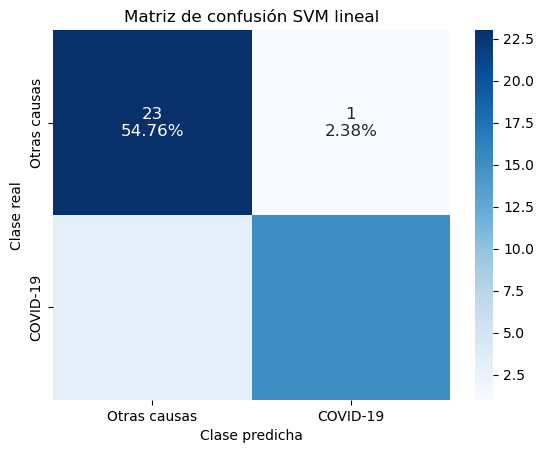

In [45]:
# Crear el DataFrame de la matriz de confusión
cf_matrix = confusion_matrix(y_test,y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix = pd.DataFrame(cf_matrix, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión SVM lineal')
plt.show()


In [46]:
cf_matrix

array([[23,  1],
       [ 3, 15]], dtype=int64)

## 4.3.- Métricas

In [47]:
from sklearn import metrics

num_classes = 2

# Calcular la especificidad para cada clase
tn = cf_matrix[0, 0]
fp = cf_matrix[0, 1]  # Falsos positivos en la clase 0
specificity = tn / (tn + fp)


# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))


Especificidad:	0.96


In [48]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.94      0.83      0.88        18

    accuracy                           0.90        42
   macro avg       0.91      0.90      0.90        42
weighted avg       0.91      0.90      0.90        42



## 4.4.- Curva ROC

In [49]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores = best_model.decision_function(testX2)
n_classes=2


# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, _ = roc_curve(y_test_bin, y_scores)
roc_auc = auc(fpr, tpr)


NameError: name 'best_model' is not defined

In [50]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores = best_model.decision_function(testX2)
n_classes=2


# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, _ = roc_curve(y_test_bin, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1- Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.savefig('curva_roc2.png')
plt.show()


NameError: name 'best_model' is not defined

# 5.- SVM NO LINEAL: Kernel lineal, cuadrático y gausiano

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## 5.1.- SVM Kernel lineal

In [29]:
param_grid_linear = [
    {
        "C":  [0.01, 0.1, 1, 10, 100],
        "kernel": ["linear"]
   }
]
#0.001,0.01, 0.1, 1,10

In [30]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC

# Definir métrica y mecanismos de evaluación interno
cv = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "f1"

# Crear un objeto GridSearchCV que realice el ajuste de hiperparámetros para cada modelo

# Modelo con kernel lineal
pipeline_linear = SVC()
grid_search_linear = GridSearchCV(pipeline_linear, param_grid_linear, cv=cv, scoring=scoring, n_jobs=-1)


In [ ]:
grid_search_linear.fit(trainX2, y_train)

In [ ]:
best_score_linear = grid_search_linear.best_score_
best_params_linear = grid_search_linear.best_params_
best_model_linear = grid_search_linear.best_estimator_

In [ ]:
print(f"El mejor F1-score obtenido en la validación interna fue: {best_score_linear:.3f}")
print(f"Los mejores valores de los otros hiperparámetros fueron: {best_params_linear}")
print(f"El mejor modelo fue: {best_model_linear}")

El mejor F1-score obtenido en la validación interna fue: 0.747
Los mejores valores de los otros hiperparámetros fueron: {'C': 1, 'kernel': 'linear'}
El mejor modelo fue: SVC(C=1, kernel='linear') con el 0.01 centrado

## 5.3.- Evaluación SVM lineal

In [ ]:
# Usa el mejor modelo encontrado para hacer predicciones en el conjunto de prueba
y_pred_linear = best_model_linear.predict(testX2)

# Calcula e imprime la precisión del modelo en el conjunto de prueba
print('Precisión en el conjunto de prueba:', f1_score(y_test, y_pred_linear))
# Imprime el modelo entrenado
print("El mejor modelo encontrado fue:", best_model_linear)

In [ ]:
# Crear el DataFrame de la matriz de confusión
cf_matrix_linear = confusion_matrix(y_test,y_pred_linear)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_linear.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_linear.flatten()/np.sum(cf_matrix_linear)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix_linear.shape[0], cf_matrix_linear.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix_linear = pd.DataFrame(cf_matrix_linear, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix_linear, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión SVM Kenerl: lineal')
plt.show()


In [ ]:
cf_matrix_linear

In [ ]:

# Definir el número de clases
num_classes = 2

# Calcular la especificidad para cada clase
tn = cf_matrix[0, 0]
fp = cf_matrix[0, 1]  # Falsos positivos en la clase 0
specificity = tn / (tn + fp)

# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))
  


In [ ]:
report = classification_report(y_test, y_pred_linear,zero_division=0)
print(report)

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores1 = best_model_linear.decision_function(testX2)
n_classes=2

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr1, tpr1, _ = roc_curve(y_test_bin, y_scores1)
roc_auc1 = auc(fpr1, tpr1)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr1, tpr1, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1- Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC SVM Kenerl: lineal')
plt.legend(loc="lower right")
plt.savefig('curva_roc3.png')
plt.show()


## 5.2.- SVM poly

In [ ]:
param_grid_poly = [
    {
        "C":  [0.1, 1, 10, 100,1000],
        "kernel": ["poly"],
        "degree": [2],
        "coef0": np.linspace(0, 1, 10)
    }
]
#0.01, 0.1, 1, 10, 100

In [ ]:
pipeline_poly = SVC()
grid_search_poly = GridSearchCV(pipeline_poly, param_grid_poly, cv=cv, scoring=scoring, n_jobs=-1)

In [ ]:
grid_search_poly.fit(trainX2, y_train)

In [ ]:
best_score_poly = grid_search_poly.best_score_
best_params_poly = grid_search_poly.best_params_
best_model_poly = grid_search_poly.best_estimator_

In [ ]:
print(f"El mejor F1-score obtenido en la validación interna fue: {best_score_poly:.3f}")
print(f"Los mejores valores de los otros hiperparámetros fueron: {best_params_poly}")
print(f"El mejor modelo fue: {best_model_poly}")

El mejor F1-score obtenido en la validación interna fue: 0.764
Los mejores valores de los otros hiperparámetros fueron: {'C': 10, 'coef0': 0.0, 'degree': 2, 'kernel': 'poly'}
El mejor modelo fue: SVC(C=10, degree=2, kernel='poly')

### 5.2.1.- Evaluación SVM POLY

In [ ]:
# Usa el mejor modelo encontrado para hacer predicciones en el conjunto de prueba
y_pred_poly = best_model_poly.predict(testX2)

# Calcula e imprime la precisión del modelo en el conjunto de prueba
print('Precisión en el conjunto de prueba:', f1_score(y_test, y_pred_poly))
# Imprime el modelo entrenado
print("El mejor modelo encontrado fue:", best_model_poly)

In [ ]:
# Crear el DataFrame de la matriz de confusión
cf_matrix2 = confusion_matrix(y_test,y_pred_poly)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix2.shape[0], cf_matrix2.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix = pd.DataFrame(cf_matrix2, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión SVM Kenerl:polinómico')
plt.show()


In [ ]:
cf_matrix2

In [ ]:
from sklearn import metrics

# Supongamos que ya tenemos la matriz de confusión (cf_matrix), Y_test y Y_test_pred definidas previamente

# Definir el número de clases
num_classes = 2
# Calcular la especificidad para cada clase
tn2 = cf_matrix2[0, 0]
fp2 = cf_matrix2[0, 1]  # Falsos positivos en la clase 0
specificity = tn2 / (tn2 + fp2)

# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))


In [ ]:
report = classification_report(y_test, y_pred_poly,zero_division=0)
print(report)

### 5.2.2.-Curva ROC POLY

In [ ]:

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores2 = best_model_poly.decision_function(testX2)
n_classes=2


# Calcular la curva ROC y el área bajo la curva (AUC)
fpr2, tpr2, _ = roc_curve(y_test_bin, y_scores2)
roc_auc2 = auc(fpr2, tpr2)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr2, tpr2, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1- Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC SMV Kenerl: polinómico')
plt.legend(loc="lower right")
plt.savefig('curva_roc4.png')
plt.show()

## 5.3.- SVM RBF

In [ ]:
param_grid_rbf = [
       {
        "C":  [0.1, 1, 10, 100,1000],
        "kernel": ["rbf"],
        "gamma": np.logspace(-2, 2, 10)
    }
]


In [ ]:
pipeline_rbf = SVC()
grid_search_rbf = GridSearchCV(pipeline_rbf, param_grid_rbf, cv=cv, scoring=scoring, n_jobs=-1)
grid_search_rbf.fit(trainX2, y_train)


In [ ]:
best_score_rbf = grid_search_rbf.best_score_
best_params_rbf = grid_search_rbf.best_params_
best_model_rbf = grid_search_rbf.best_estimator_

In [ ]:
print(f"El mejor F1-score obtenido en la validación interna fue: {best_score_rbf:.3f}")
print(f"Los mejores valores de los otros hiperparámetros fueron: {best_params_rbf}")
print(f"El mejor modelo fue: {best_model_rbf}")

El mejor F1-score obtenido en la validación interna fue: 0.574
Los mejores valores de los otros hiperparámetros fueron: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
El mejor modelo fue: SVC(C=10, gamma=0.01)

### 5.3.1.- Evaluación SVM RBF

In [ ]:
# Usa el mejor modelo encontrado para hacer predicciones en el conjunto de prueba
y_pred_rbf = best_model_rbf.predict(testX2)

# Calcula e imprime la precisión del modelo en el conjunto de prueba
print('Precisión en el conjunto de test:', f1_score(y_test, y_pred_rbf))
# Imprime el modelo entrenado
print("El mejor modelo encontrado fue:", best_model_rbf)

In [ ]:
# Crear el DataFrame de la matriz de confusión
cf_matrix3 = confusion_matrix(y_test,y_pred_rbf)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix3.flatten()/np.sum(cf_matrix3)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix3.shape[0], cf_matrix3.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix = pd.DataFrame(cf_matrix3, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión SVM Kenerl: gausiano')
plt.show()

In [ ]:
cf_matrix3

In [ ]:
report = classification_report(y_test, y_pred_rbf, zero_division=0)
print(report)

In [ ]:
# Definir el número de clases
num_classes = 2

# Calcular la especificidad para cada clase
tn3 = cf_matrix3[0, 0]
fp3 = cf_matrix3[0, 1]  # Falsos positivos en la clase 0
specificity = tn3 / (tn3 + fp3)


# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))
   


### 5.3.2.- Curva ROC RBF

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores3 = best_model_rbf.decision_function(testX2)


# Calcular la curva ROC y el área bajo la curva (AUC)
fpr3, tpr3, _ = roc_curve(y_test_bin, y_scores3)
roc_auc3 = auc(fpr3, tpr3)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr3, tpr3, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Sensibilidad')
plt.ylabel('1- Especificidad')
plt.title('Curva ROC SVM Kenerl:RBF')
plt.legend(loc="lower right")
plt.savefig('curva_roc5.png')
plt.show()

# 6.- Conclusiones

## 6.1.- Conclusión SVM no lineal

Resultados datos de entrenamiento

In [ ]:
# Crear un catálogo para almacenar los mejores puntajes y parámetros de cada modelo
best_results = {
    "Modelo Lineal": {
        "best_score": best_score_linear,
        "best_params": best_params_linear
    },
    "Modelo Polinomial": {
        "best_score": best_score_poly,
        "best_params": best_params_poly
    },
    "Modelo RBF": {
        "best_score": best_score_rbf,
        "best_params": best_params_rbf
    }
}

# Imprimir el catálogo de mejores resultados para cada modelo
for modelo, resultados in best_results.items():
    print(f"Modelo: {modelo}")
    print(f"Mejor Puntaje: {resultados['best_score']:.3f}")
    print(f"Mejores Parámetros: {resultados['best_params']}")
    print()


Resultados datos de test

In [ ]:
print('F1 en el conjunto de prueba linear:', round(f1_score(y_test, y_pred_linear), 4))
print('F1 en el conjunto de prueba poly:', round(f1_score(y_test, y_pred_poly), 4))
print('F1 en el conjunto de prueba rbf:', round(f1_score(y_test, y_pred_rbf), 4))

In [ ]:
# Imprimir el AUC para cada modelo
print("AUC para el modelo lineal:", round(roc_auc1, 4))
print("AUC para el modelo polinomial:", round(roc_auc2, 4))
print("AUC para el modelo RBF:", round(roc_auc3, 4))

## 6.2.- Comparar SVM lineal vs SVM no lineal kernel lineal

Resultados datos de entrenamiento

In [ ]:
print("Mejores Parámetros:", grid_search.best_params_)
print("Mejor Score F1:", grid_search.best_score_)

Resultados datos de test

In [ ]:
print('Precisión en el conjunto de prueba SVM lineal:', round(f1_score(y_test, y_pred),4))

In [ ]:
print("AUC para el modelo SVM lineal:", round(roc_auc, 4))

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para los gráficos
fig, ax = plt.subplots()

# Trazar la primera curva ROC
ax.plot(fpr1, tpr1, color='#73A4CA', lw=2, label='SVM Kernel: Lineal (AUC = %0.2f)' % roc_auc1)

# Trazar la segunda curva ROC
ax.plot(fpr2, tpr2, color='#5FBB68', lw=2, label='SVM Kernel: Polinómico (AUC = %0.2f)' % roc_auc2)

# Trazar la tercera curva ROC
ax.plot(fpr3, tpr3, color='#F9D23C', lw=2, label='SVM Kernel: RBF (AUC = %0.2f)' % roc_auc3)

# Agregar la línea de referencia 45 grados
ax.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')

# Configurar los ejes y etiquetas
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('1 - Especificidad')
ax.set_ylabel('Sensibilidad')
ax.set_title('Curvas ROC de SVM con diferentes Kernels')
ax.legend(loc="lower right")

# Guardar la figura como imagen
plt.savefig('curvas_roc.png')

# Mostrar la figura
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Crear una figura y ejes para los gráficos
fig, ax = plt.subplots()

# Trazar las curvas ROC de los diferentes kernels SVM
ax.plot(fpr1, tpr1, color='#73A4CA', lw=2, label='SVM Kernel: Lineal (AUC = %0.2f)' % roc_auc1)
ax.plot(fpr2, tpr2, color='#5FBB68', lw=2, label='SVM Kernel: Polinómico (AUC = %0.2f)' % roc_auc2)
ax.plot(fpr3, tpr3, color='#F9D23C', lw=2, label='SVM Kernel: RBF (AUC = %0.2f)' % roc_auc3)

# Trazar la curva ROC del modelo específico
ax.plot(fpr, tpr, color='#F9A729', lw=2, label='Curva ROC SVM lineal (AUC = %0.2f)' % roc_auc)

# Agregar la línea de referencia 45 grados
ax.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')

# Configurar los ejes y etiquetas
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('1 - Especificidad')
ax.set_ylabel('Sensibilidad')
ax.set_title('Curvas ROC de SVM con diferentes Kernels y Curva ROC del Modelo')
ax.legend(loc="lower right")

# Guardar la figura como imagen
plt.savefig('curvas_roc.png')

# Mostrar la figura
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Crear una figura y ejes para los gráficos
fig, ax = plt.subplots()

# Trazar las curvas ROC de los diferentes kernels SVM
ax.plot(fpr, tpr, color='#F9A729', lw=2, label='SVM lineal (AUC = %0.2f)' % roc_auc)
ax.plot(fpr1, tpr1, color='#73A4CA', lw=2, label='SVM Kernel: Lineal (AUC = %0.2f)' % roc_auc1)
ax.plot(fpr2, tpr2, color='#5FBB68', lw=2, label='SVM Kernel: Polinómico (AUC = %0.2f)' % roc_auc2)
ax.plot(fpr3, tpr3, color='#F9D23C', lw=2, label='SVM Kernel: RBF (AUC = %0.2f)' % roc_auc3)

# Trazar la curva ROC del modelo específico


# Agregar la línea de referencia 45 grados
ax.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')

# Configurar los ejes y etiquetas
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('1 - Especificidad')
ax.set_ylabel('Sensibilidad')
ax.set_title('Curvas ROC de SVM lineal y SVM con diferentes Kernels ')
ax.legend(loc="lower right")

# Guardar la figura como imagen
plt.savefig('curvas_roc.png')

# Mostrar la figura
plt.show()
